In [1]:
#Importamos las librerias

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### Carga de datos

In [2]:
df_fb = pd.read_csv("Publicacions Facebook Thailandia.csv")
df_fb.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### Exploración rápida de columnas

In [3]:
df_fb.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [4]:
#Renombre a algunas columnas
cols= ['status_id', 'status_type', 'status_published', 'reactions',
       'comments', 'shares', 'likes', 'loves', 'wows',
       'hahas', 'sads', 'angrys', 'Column1', 'Column2', 'Column3',
       'Column4']
df_fb.columns= cols
df_fb.head(2)

,status_id,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN


### Descripción de las variables

Estas publicaciones se extrajeron de las páginas de Facebook de 10 vendedores minoristas de moda y cosméticos tailandeses desde marzo de 2012 hasta junio de 2018. El conjunto de datos se recopiló a través de la API de Facebook y se anonimizó de conformidad con la Política de plataforma de Facebook para desarrolladores [1]. Para cada publicación de Facebook, el conjunto de datos registra las métricas de participación resultantes que incluyen acciones, comentarios y reacciones emoji dentro de las cuales distinguimos los "me gusta" tradicionales de las reacciones emoji introducidas recientemente, que son "me encanta", "guau", "jaja", "triste". " y enojado". Este conjunto de datos podría servir como base para la investigación sobre el compromiso del cliente con el novedoso canal de ventas que es Facebook Live, a través de estudios comparativos con otras formas de contenido (texto, videos diferidos e imágenes), así como el análisis estadístico de la estacionalidad de compromiso y publicaciones atípicas.  
Fuente: Dataset on usage and engagement patterns for Facebook Live sellers in Thailand [Nassim Dehouche,2020]

**status_id :** identificación  
**status_type :** tipo de publicación( foto, vídeo, status...)  
**status_published :** fecha y hora de publicación  
**reactions :** suma de las columnas likes, loves, wows,hahas,sads, angrys.  
**comments :** número de comentarioss en el post  
**shares :** número de shares en el post  
**likes :** número de likes en el post  
**loves :** número de "corazones" en el post  
**wows :** número de emojis de "wow" en el post  
**hahas :** número de emojis de "risa" en el post  
**sads :** número de emojis de "tristeza" en el post  
**angrys :** número de emojis de "enojo" en el post  
**Columna 1, 2,3 y 4 :** parecen ser columnas vacías/nulas.

### Limpieza
a) Nulos  
b) Vacíos  
c) Duplicados  

In [5]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   reactions         7050 non-null   int64  
 4   comments          7050 non-null   int64  
 5   shares            7050 non-null   int64  
 6   likes             7050 non-null   int64  
 7   loves             7050 non-null   int64  
 8   wows              7050 non-null   int64  
 9   hahas             7050 non-null   int64  
 10  sads              7050 non-null   int64  
 11  angrys            7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [6]:
# Las columnas 1,2, 3 y 4 estan vacías así que se eliminan

df_fb = df_fb.drop(['Column1', 'Column2', 'Column3','Column4'],axis=1)
df_fb.head(3)

,status_id,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0


In [7]:
df_fb.duplicated().sum()

51

> Existen 51 valores duplicados

In [8]:
# Eliminamos los duplicados
df_fb = df_fb.drop_duplicates()

#### En principio las reacciones es la suma de likes, loves, wows, haha, sads, angrys. Se comprueba esta hipótesis


In [9]:
#Crear una columna con la suma
df_fb['reactions_suma']=df_fb.likes +df_fb.loves+df_fb.wows+df_fb.hahas+df_fb.sads+df_fb.angrys

# Se asigna 1 para los iguales y 0 para los diferentes
df_fb['comprobacion'] = np.where(df_fb['reactions'] == df_fb['reactions_suma'], 1, 0) 
df_fb.head(4)

,status_id,status_type,status_published,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,reactions_suma,comprobacion
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,1
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,1
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,227,1
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,111,1


In [10]:
df_fb.comprobacion.value_counts()

comprobacion
1    6990
0       9
Name: count, dtype: int64

> Hay 9 valores que no coinciden, en este caso los eliminare.

In [11]:
df_fb= df_fb.drop(['comprobacion','reactions_suma'],axis=1)

##### Verificar nulos

In [12]:
df_fb.isnull().sum()

status_id           0
status_type         0
status_published    0
reactions           0
comments            0
shares              0
likes               0
loves               0
wows                0
hahas               0
sads                0
angrys              0
dtype: int64

In [13]:
#Ahora que ya se han eliminado los duplicados, verificado nulos y vacíos, hay dos columnas que para efectos de este ejercicio
# no me parecen útiles, por lo cual, los eliminare: status_id y status_published

In [14]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         6999 non-null   object
 1   status_type       6999 non-null   object
 2   status_published  6999 non-null   object
 3   reactions         6999 non-null   int64 
 4   comments          6999 non-null   int64 
 5   shares            6999 non-null   int64 
 6   likes             6999 non-null   int64 
 7   loves             6999 non-null   int64 
 8   wows              6999 non-null   int64 
 9   hahas             6999 non-null   int64 
 10  sads              6999 non-null   int64 
 11  angrys            6999 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 710.8+ KB


> Al terminar la limpieza, nos quedan **6990** registros y 12 registros para trabajar. 9 de ellos son tipo int64 y el resto objetos(texto). Se han eliminado 51 registros(7%) y 4 columnas del dataframe inicial. 

#### Exploración estadística y gráfica de los datos

In [15]:
df_fb.describe().round(1)

,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
count,6999.0,6999.0,6999.0,6999.0,6999.0,6999.0,6999.0,6999.0,6999.0
mean,225.0,225.6,40.3,209.9,12.8,1.3,0.7,0.2,0.1
std,452.9,892.7,132.0,439.6,40.1,8.7,4.0,1.5,0.7
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,17.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0
50%,58.0,4.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0
75%,216.0,22.0,4.0,182.0,3.0,0.0,0.0,0.0,0.0
max,4710.0,20990.0,3424.0,4710.0,657.0,278.0,157.0,51.0,31.0


> El público ha reaccionado un promedio de **225 veces** a cada post o publicación de facebook. Siendo los **"likes"** la reacción más común, en promedio por cada publicación **210** de las reacciones son likes. La segunda reacción más utilizada es el **corazón** con 13 en promedio.     

> La desviación estandar de los likes es muy alta(439). Esto se puede observar, por ejemplo si analizamos el máximo=4710, puede haber sido una publicación con mucho éxito.

> Algo interesante es observar que la media de reacciones y comentarios es la misma, 225 en promedio. Sin embargo, cuando observamos los máximos(reactions=4710 y comments=20990) observamos una gran diferencia. Esto puede ocurrir, por ejemplo, en ciertas publicaciones donde existen promociones como "etiqueta a un amigo y gana un viaje". O aveces, hay juegos por parte de la comunidad en donde empiezan a escribir muchos comentarios. En estos casos es útil observar por ejemplo el 75% de los datos. El 75% de los post tienen 216 reacciones y 22 comentarios.

## Análisis de la columna status_type

El análisis de la columna status_type me parece importante porque observaremos si los clusters que se generan estan relacionados a photo, video,status y link. Es decir 4 clusters.
Analicemos de forma númerica y gráfica

In [16]:
#Contamos el número de publicaciones por tipo 
df_fb["status_type"].value_counts().sort_values( ascending=False)

status_type
photo     4244
video     2333
status     359
link        63
Name: count, dtype: int64

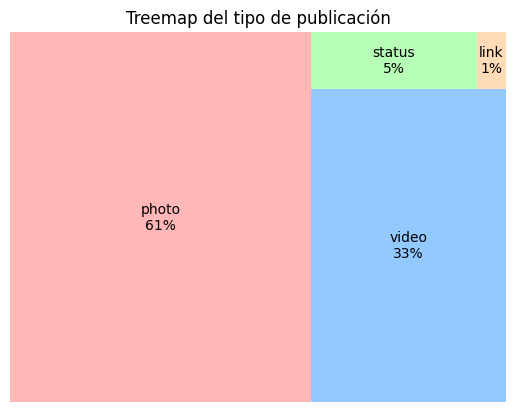

In [17]:
import squarify

status_counts = df_fb["status_type"].value_counts().sort_values(ascending=False) #contadores

status_percentages = (status_counts / status_counts.sum()) * 100 #porcentajes
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'] #colores

# Crear un treemap utilizando la función squarify y mostrar los porcentajes en las etiquetas
squarify.plot(sizes=status_counts.values, label=[f"{label}\n{percent:.0f}%" for label, percent in zip(status_counts.index, status_percentages)],
              color=colors, alpha=0.7)

# Agregar título y eliminar ejes
plt.title("Treemap del tipo de publicación")
plt.axis('off')
plt.show()


In [18]:
# Analizamos cuantos datos se tienen por tipo de publicación
df_fb.groupby('status_type')[['reactions','comments','shares','likes','loves','wows','hahas','sads','angrys']].sum()


,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
status_type,,,,,,,,,
link,23319,359,277,23286,19,12,2,0,0
photo,731372,65678,10574,721490,5748,2623,793,536,169
status,158944,13078,925,157797,549,423,40,126,9
video,661102,1499524,269994,566844,82932,5711,4050,966,593


> Es notable como las publicaciones de fotos y video en esos tiempos eran las predominantes (fotos=61% y video 33%). Aunque no es algo que no nos interese en este estudio, puede que los desarrolladores de Instagram observaron esto y de allí surgiera el concepto de esta red social que se enfoca en publicaciones fotos, vídeos e historias.

In [19]:
# Eliminaremos las siguientes columnas que no las utilizaré en mi análisis
df_fb = df_fb.drop(['status_id', 'status_published'],axis=1)
df_fb.head(3)

,status_type,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0


In [20]:
#### Separamos df_fb= dataframe sin normalizar y X=dataframe donde se normalizaran los datos

In [21]:
df_fb['type']=df_fb['status_type']
df_fb = pd.get_dummies(df_fb, prefix= 'type', columns = ["status_type"])
type_cols = df_fb[['type_link', 'type_photo', 'type_status','type_video']]
type_cols = type_cols.replace({True: 1, False: 0})
df_fb.update(type_cols)

In [22]:
#Vamos a utilizar One Hot Encoding para esta variable y utilizaremos el dataframe X para normalizar los datos
X = df_fb.copy()
X.head(4)

,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,type,type_link,type_photo,type_status,type_video
0,529,512,262,432,92,3,1,1,0,video,0,0,0,1
1,150,0,0,150,0,0,0,0,0,photo,0,1,0,0
2,227,236,57,204,21,1,1,0,0,video,0,0,0,1
3,111,0,0,111,0,0,0,0,0,photo,0,1,0,0


In [23]:
df_fb.shape

(6999, 14)

In [24]:
X.shape

(6999, 14)

##  Exercici 1  

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

### K-means method
#### Scaling
Algo importante en el método de k-means es el escalado. Lo realizaremos al inicio


In [25]:
X.columns

Index(['reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas',
       'sads', 'angrys', 'type', 'type_link', 'type_photo', 'type_status',
       'type_video'],
      dtype='object')

In [26]:
#### Comprobación de normalidad para las variables

In [27]:
from scipy import stats
cols = ['reactions', 'comments', 'shares', 'likes', 'loves',
       'wows', 'hahas', 'sads', 'angrys']
for i in X[cols].columns:
    shapiro_test = stats.shapiro(X[cols][i])
    print('Para el atributo', i, "con un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('La muestra tiene una distribución normal\n')
    else:
        print("La muestra no sigue una distribució normal\n")

Para el atributo reactions con un p-value de  0.0
La muestra no sigue una distribució normal

Para el atributo comments con un p-value de  0.0
La muestra no sigue una distribució normal

Para el atributo shares con un p-value de  0.0
La muestra no sigue una distribució normal

Para el atributo likes con un p-value de  0.0
La muestra no sigue una distribució normal

Para el atributo loves con un p-value de  0.0
La muestra no sigue una distribució normal

Para el atributo wows con un p-value de  0.0
La muestra no sigue una distribució normal

Para el atributo hahas con un p-value de  0.0
La muestra no sigue una distribució normal

Para el atributo sads con un p-value de  0.0
La muestra no sigue una distribució normal

Para el atributo angrys con un p-value de  0.0
La muestra no sigue una distribució normal



> Ninguna sigue una distribución normal

#### Outliers

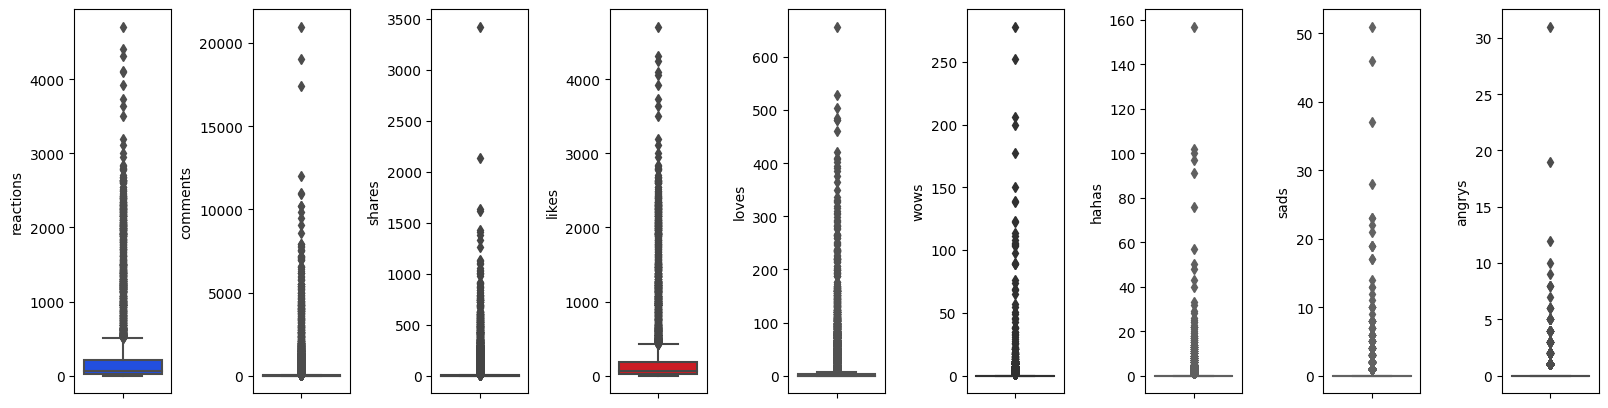

In [28]:
from seaborn.palettes import color_palette
mi_paleta = color_palette("bright", n_colors=len(X[cols].columns))

fig, axs = plt.subplots(ncols=9, nrows=1, figsize=(16, 4))
indice = 0
axs = axs.flatten()
for titulos,z in X[cols].items():
    sns.boxplot(y=titulos, data=X[cols], ax=axs[indice],color=mi_paleta[indice])
    indice += 1
plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=5.0)

> Columnas con outliers y sin distribución normal:  'reactions', 'comments', 'shares', 'likes', 'loves','wows', 'hahas', 'sads', 'angrys'  

#### Crear el column transformer para cada columna con el tipo de escalado que le aplique

In [29]:
cols_Robust=['reactions', 'comments', 'shares', 'likes', 'loves','wows', 'hahas', 'sads', 'angrys']

In [30]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler

#Funciones
robust= RobustScaler()

scaler_Robust = robust.fit(X[cols_Robust])
X[cols_Robust] = scaler_Robust.transform(X[cols_Robust])

X.head(3)

,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,type,type_link,type_photo,type_status,type_video
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,video,0,0,0,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,photo,0,1,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,video,0,0,0,1


In [31]:
X.describe().round(2)

,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,type_link,type_photo,type_status,type_video
count,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00,6999.00
mean,0.84,10.07,10.06,0.93,4.25,1.25,0.70,0.23,0.11,0.01,0.61,0.05,0.33
std,2.28,40.58,33.01,2.66,13.37,8.73,3.97,1.48,0.69,0.09,0.49,0.22,0.47
min,-0.29,-0.18,0.00,-0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.21,-0.18,0.00,-0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.79,0.82,1.00,0.76,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
max,23.38,953.91,856.00,28.20,219.00,278.00,157.00,51.00,31.00,1.00,1.00,1.00,1.00


In [32]:
X.columns

Index(['reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas',
       'sads', 'angrys', 'type', 'type_link', 'type_photo', 'type_status',
       'type_video'],
      dtype='object')

#### Análisis de componentes principales

Aplicaremos un análisis de componentes de principales para reducir la dimensionalidad de nuestros datos. Esto será útil para graficar.

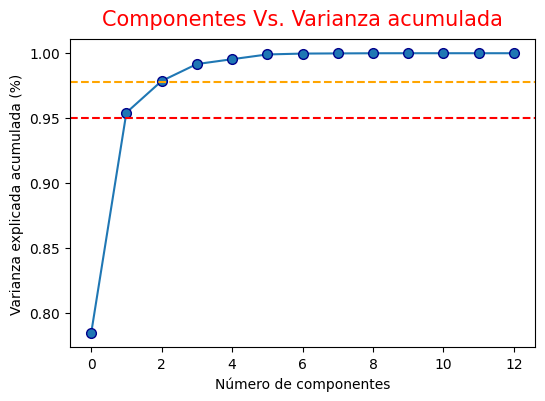

In [33]:
from sklearn.decomposition import PCA
cols_PCA = ['reactions', 'comments', 'shares', 'likes', 'loves','wows', 'hahas', 'sads', 'angrys','type_link', 'type_photo', 'type_status','type_video']
pca = PCA().fit(X[cols_PCA])
plt.figure(figsize = (6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o", markersize=7, markeredgecolor='darkblue')
plt.axhline(0.95, color = "red", linestyle = "--")
plt.axhline(0.978, color = "orange", linestyle = "--")
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada (%)')
plt.title("Componentes Vs. Varianza acumulada", fontsize=15, pad=10, color='red')

plt.show()

In [34]:
# Se muestra el % de varianza explicada acumulada.
np.cumsum(pca.explained_variance_ratio_)

array([0.78422447, 0.95422252, 0.97858612, 0.99164569, 0.99538112,
       0.99905616, 0.99972453, 0.99985646, 0.99997269, 0.99999614,
       1.        , 1.        , 1.        ])

> Elegimos 2 PCA con casi el 98% de los datos representados. Al elegir un PCA=2, permite realizar un gráfico de dos dimensiones.

# Ajustamos el modelo y los datos al PCA=2

In [35]:
X.columns

Index(['reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas',
       'sads', 'angrys', 'type', 'type_link', 'type_photo', 'type_status',
       'type_video'],
      dtype='object')

#### Realizamos el PCA de las columnas sin incluir las columnas "dummies"

In [36]:
pca = PCA(n_components=2, random_state=45)
pca.fit(X[cols_PCA])
pca_fb = pd.DataFrame(pca.transform(X[cols_PCA]), columns=['PCA1', 'PCA2'])
pca_fb.head(2)

,PCA1,PCA2
0,48.146219,39.281738
1,-14.876282,-2.242583


In [37]:
pca_fb.shape

(6999, 2)

### Elección de los números de K-means,

Esta es uno de los pasos críticos para el modelo, hay que elegir cuantos Clusters deseamos en el modelo. Si no tenemos una idea en particular o el expertise, hacemos uso de una técnica denominada "elbow". Esto mide el SSE para cada cluster y elegimos uno de los que menor SSE tenga, sin embargo, no hay que elegir el mínimo del SSE porque tendríamos overfitting y demasiados clusters.  

### Elbow Method

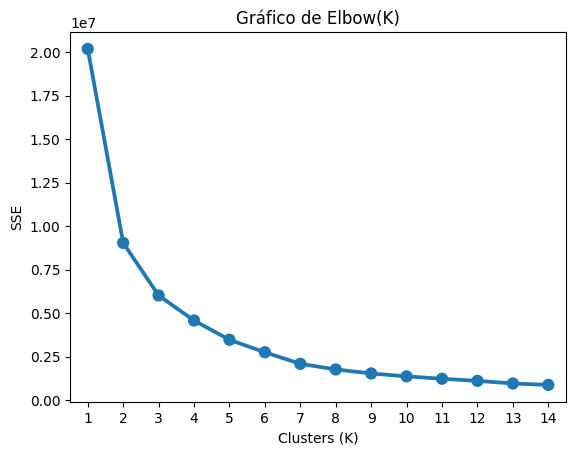

In [38]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

def elbow_plot(df):
    """Create elbow plot from normalized data"""
    sse = {}
    sse_r = []
    for k in range(1, 15):
        kmeans = KMeans(n_clusters=k, random_state=45)
        kmeans.fit(df)
        sse[k] = kmeans.inertia_
        sse_r.append(kmeans.inertia_)
    
    plt.title('Gráfico de Elbow(K)')
    plt.xlabel('Clusters (K)')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()
    return sse_r

sse = elbow_plot(pca_fb)

In [39]:
# Encontramos el knee locator
knee_l = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")
print ('Número óptimo de clusters:', knee_l.elbow)

Número óptimo de clusters: 3


### Silhouette
Analizaremos mediante el método de Silhouette el performance para diferentes clusters.

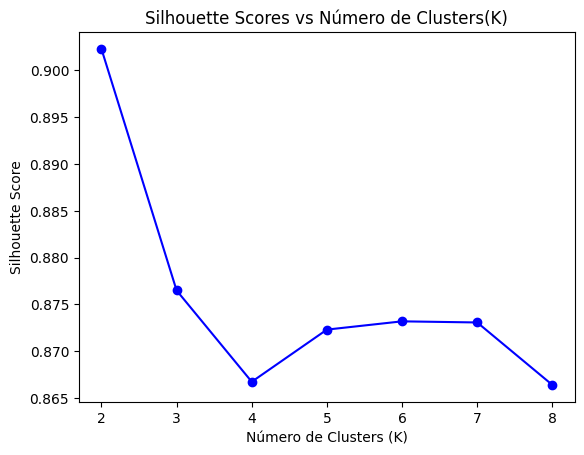

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def plot_silhouette(data, k_values):
    silhouette_scores = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=45)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plotting the Silhouette scores
    plt.plot(k_values, silhouette_scores, 'bo-')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores vs Número de Clusters(K)')
    plt.show()

# Ingresamos los parámetros en la función
k_values = [2, 3, 4, 5, 6, 7, 8]
plot_silhouette(pca_fb, k_values)


> En este caso al realizar el método de Silhouette, el número optimo debería ser 2 clusters. Con el cluster k=3, es el segundo mejor así que tampoco esta muy alejado de un buen performance, además, al tener 3 cluster nos podría dar más información respecto a agrupaciones comunes.

En nuestro caso elegiremos lo que sugiere el método de elbow y observaremos los resultados. **K=3**.

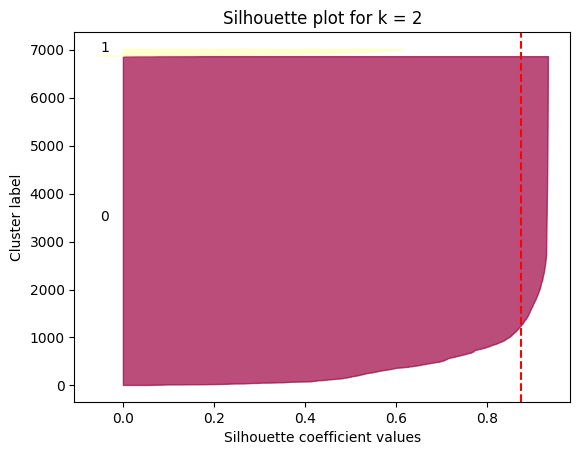

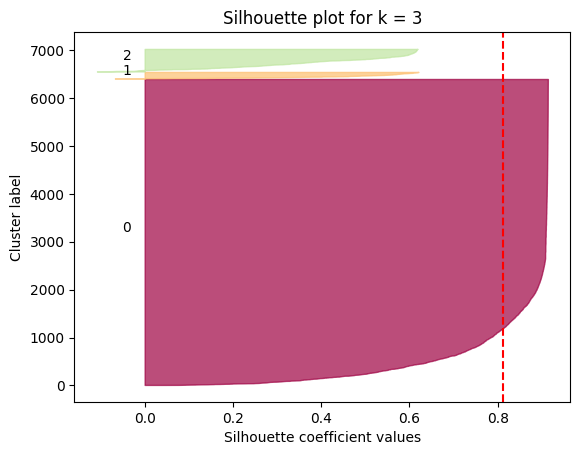

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Obtener las columnas de interés para el cálculo del coeficiente de silueta
X = df_fb[['reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas', 'sads', 'angrys']]

# Número de clusters a evaluar
cluster_range = [2,3]

# Iterar sobre los valores de número de clusters
for num_clusters in cluster_range:
    # Crear el modelo de clustering
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calcular el coeficiente de silueta para cada muestra
    silhouette_vals = silhouette_samples(X, cluster_labels)
    
    # Calcular los límites de los gráficos de silueta
    y_lower = 10
    for i in range(num_clusters):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        cluster_silhouette_vals.sort()
        cluster_size = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + cluster_size
        
        # Colorear los gráficos de silueta
        color = plt.cm.get_cmap("Spectral")(i / num_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
        
        # Etiquetas y límites de los ejes
        plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
        y_lower = y_upper + 10
        
    # Promedio del coeficiente de silueta para todos los datos
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Línea vertical para el promedio del coeficiente de silueta
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # Etiquetas y título del gráfico
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.title("Silhouette plot for k = {}".format(num_clusters))
    plt.show()


#### Entrenamiento del modelo

In [42]:
k_means = KMeans(n_clusters=3, random_state=45)
k_means.fit(pca_fb)

KMeans(n_clusters=3, random_state=45)

#### Predicciones del modelo

In [43]:
y_pred_km = k_means.predict(pca_fb)
y_pred_km

array([2, 0, 0, ..., 0, 0, 0])

#### Predicciones de clusters

In [44]:
pca_fb['km_cluster_pred'] = y_pred_km
df_fb['km_cluster_pred'] = y_pred_km  #almacenamos tambien en la base de datos inicial
pca_fb.head(5)

,PCA1,PCA2,km_cluster_pred
0,48.146219,39.281738,2
1,-14.876282,-2.242583,0
2,3.375964,3.441262,0
3,-14.880365,-2.249211,0
4,-14.270582,-1.396058,0


> El data frame pca_fb muestra los dos componentes principales representativo de todos los componenetes y el cluster a cual pertenecen. Ahora vamos a visualizarlo para un mejor entendimiento.

### Visualización grafica
#### Visualización PCA y sus Clusters

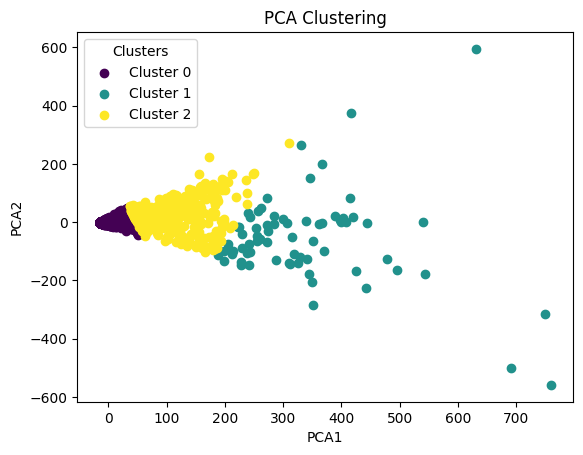

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clusters(pca_data, cluster_labels):
    unique_clusters = np.unique(cluster_labels)
    colors = plt.cm.get_cmap('viridis', len(unique_clusters))

    fig, ax = plt.subplots()
    for i, cluster in enumerate(unique_clusters):
        cluster_data = pca_data[cluster_labels == cluster]
        ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], color=colors(i), label=f'Cluster {cluster}')

    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_title('PCA Clustering')
    ax.legend(title='Clusters', loc='best')
    plt.show()

# Usage example
plot_clusters(pca_fb, pca_fb.km_cluster_pred)


> Una de las razones por las cuales se utilizan los PCA es observar gráficamente como se agrupan los puntos en el gráfico. Se puede observar como el Cluster 0 agrupa varios puntos en el mismo sitio, pareciera ser que se solapan, el amarillo sigue la misma tendencia pero con un espacio más grande. Por ultimo el cluster verde  tiene puntos más dispersos.

> Ahora bien, lo más importante es analizar que hay en cada Cluster, que tipos de datos, como se distribuyen. Para esto debemos ir al dataframe inicial para analizar las reacciones, comentarios, shares...etc.

#### Gráficos por variable y Clusters

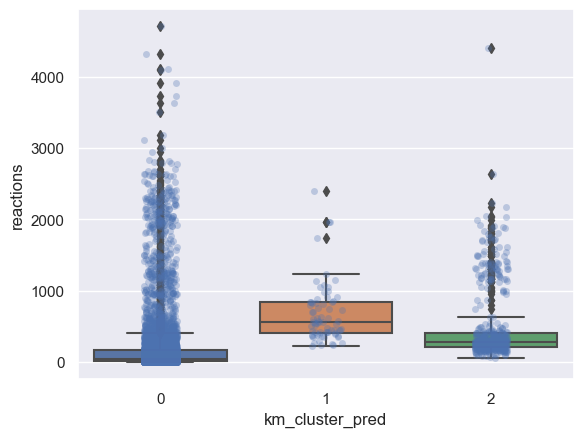

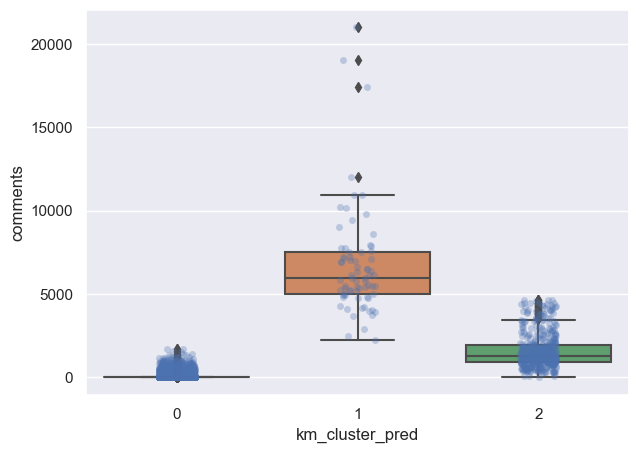

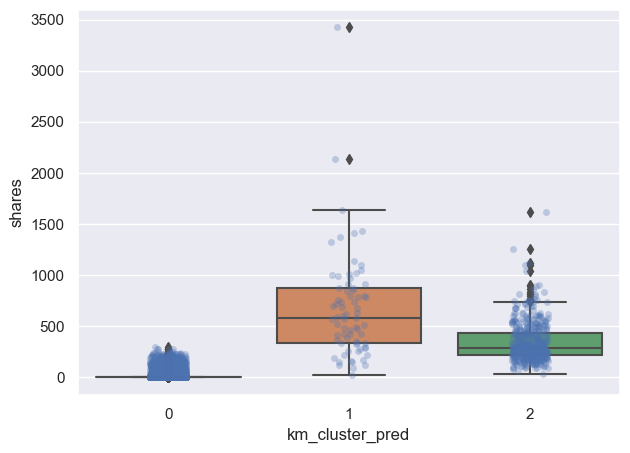

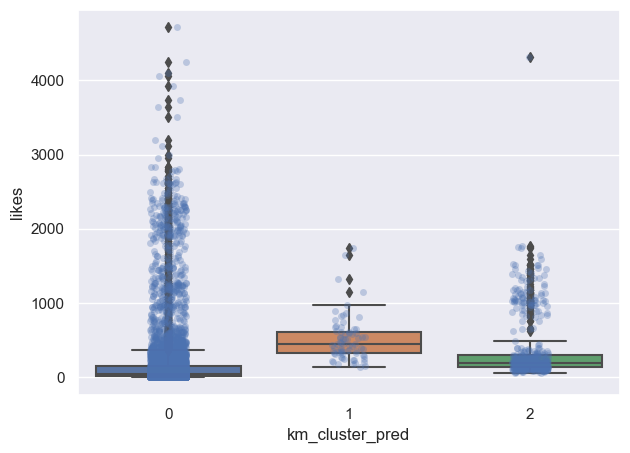

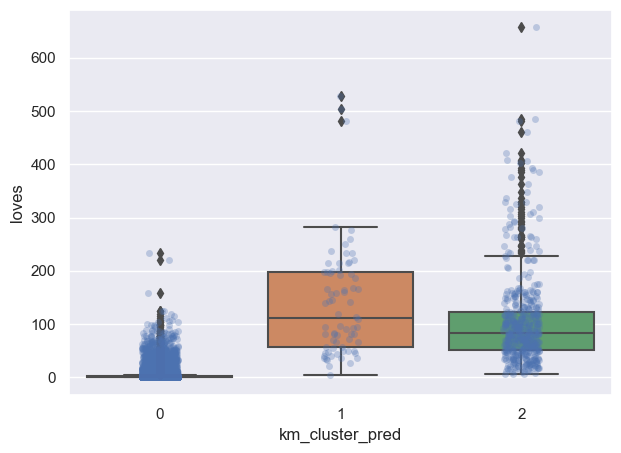

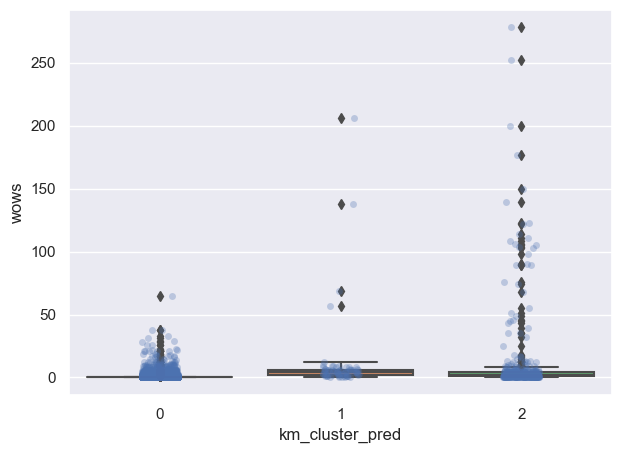

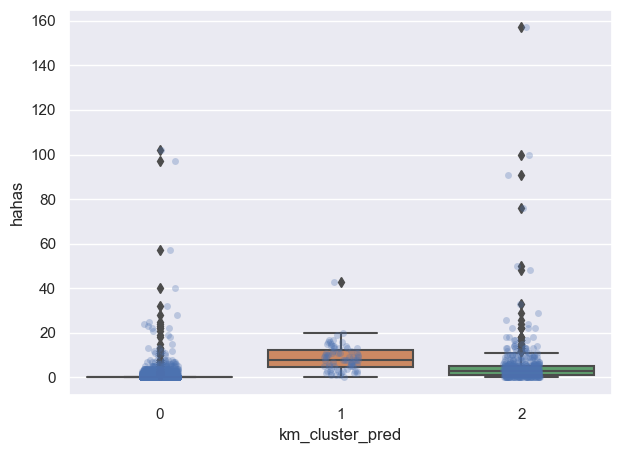

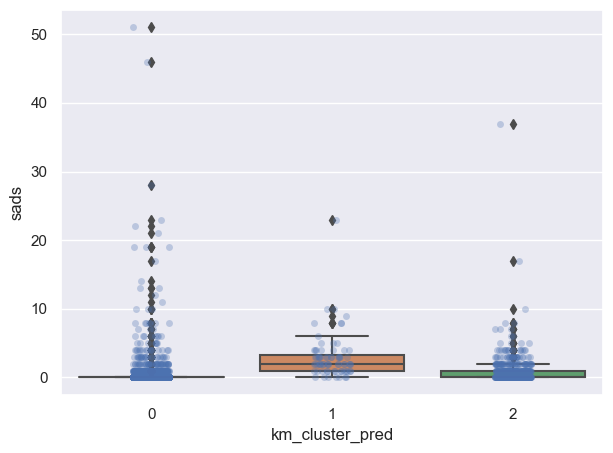

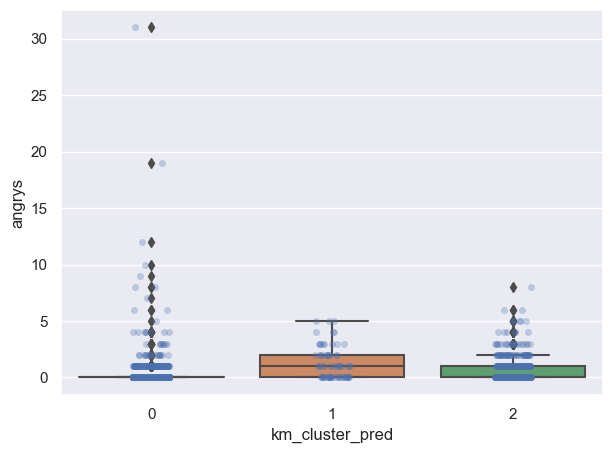

In [46]:
cols = ['reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas','sads', 'angrys']

for i in cols:
    plt.figure()
    sns.set(rc={"figure.figsize":(7, 5)})
    plt.tight_layout()
    sns.boxplot(x='km_cluster_pred', y=i, data=df_fb)
    sns.stripplot(x='km_cluster_pred', y=i, data=df_fb, alpha=0.3)

### Agrupamos por clusters y las medias de cada una de las columnas

In [47]:
df_fb.groupby('km_cluster_pred')[['reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas','sads', 'angrys']].mean().astype(int)

,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
km_cluster_pred,,,,,,,,,
0,200,51,10,194,4,0,0,0,0
1,680,6760,677,517,139,10,8,3,1
2,493,1603,342,372,105,8,4,1,0


#### Número de registros o filas por cada cluster

Text(0.5, 1.0, 'Número de filas/registros por Cluster')

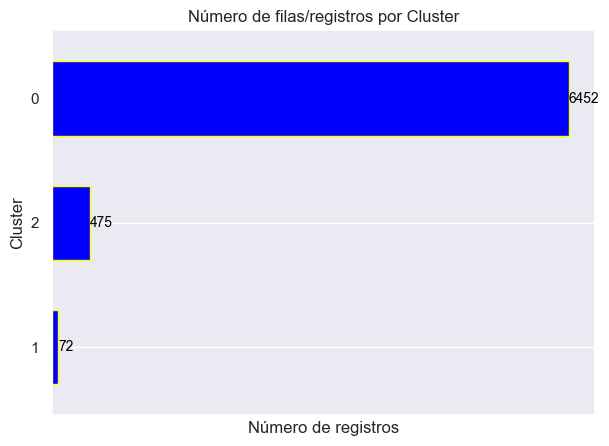

In [48]:
ax= df_fb.km_cluster_pred.value_counts().sort_values().plot(kind='barh',color='blue',edgecolor='yellow',width=0.6)
ax.bar_label(ax.containers[0], fontsize=10, color='black', label_type='edge')
ax.set_xticks([])
plt.xlabel('Número de registros')
plt.ylabel('Cluster')
plt.title('Número de filas/registros por Cluster')

> Interesante ver como el cluster 0, acumula muchos "registros" pero sus números y medias son bajas, el sistema agrupo muchos registros con pocas interacciones. Por el contrario del "2" que tiene pocos registros pero muchos interacciones, de hecho en la gráfica de PCA Clustering, se observa como los valores estan alejados del centroide.

#### Gráfico de medias por cluster de cada variable

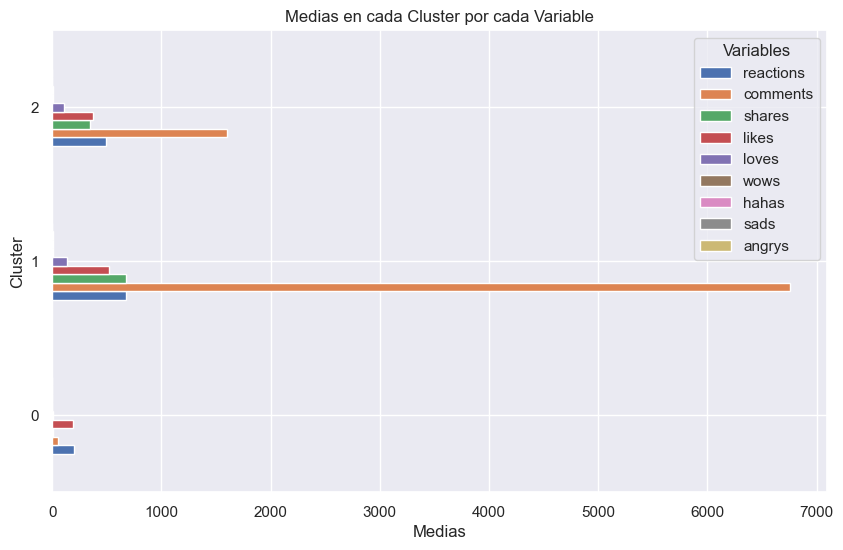

In [49]:
 df_fb.groupby('km_cluster_pred')[['reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas', 'sads', 'angrys']].mean().astype(int).plot(kind='barh', figsize=(10, 6))
plt.xlabel('Medias')
plt.ylabel('Cluster')
plt.title('Medias en cada Cluster por cada Variable')
plt.legend(title='Variables')
plt.show()


In [50]:
df_fb.head(4)

,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,type,type_link,type_photo,type_status,type_video,km_cluster_pred
0,529,512,262,432,92,3,1,1,0,video,0,0,0,1,2
1,150,0,0,150,0,0,0,0,0,photo,0,1,0,0,0
2,227,236,57,204,21,1,1,0,0,video,0,0,0,1,0
3,111,0,0,111,0,0,0,0,0,photo,0,1,0,0,0


<Axes: xlabel='km_cluster_pred', ylabel='count'>

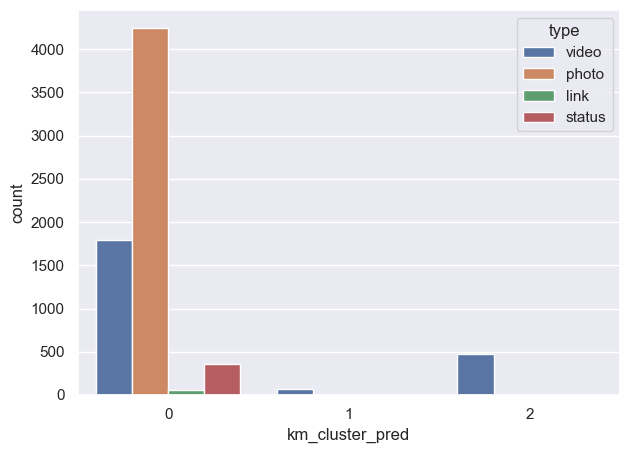

In [63]:
sns.countplot(x="km_cluster_pred", hue="type", data=df_fb)

> En el cluster 0 estan la mayor cantidad de post relacionadas a fotos video y status, el cluster=2 también muestra una cantidad considerable de videos. El cluster=1, aunque en menor proporción agrupa en su mayoria videos.

# Conclusiones generales
En los cluster 1,2, 3 el valor más alto o el que predomina es el de los comentarios, seguido de las reacciones. Si los analizamos por cluster:  
**Cluster 0:** Muestra la mayor cantidad de registros(6452) pero con medias bajas. Dentro de sus valores altos estan los likes y reacciones.   
**Cluster 1:** los comentarios ocupan el primer lugar, seguido de reacciones. Este cluster agrupa pocos registros pero muchas interacciones.  
**Cluster 2:** muy similar al cluster 2, muchos comentarios, seguido de reacciones, likes y shares. Este cluster es más disperso, a comparación del cluster 0 que es más compacto y sus tendencias entre registros es más similar.  


Se observa como el "like" es el más predominante de las "emociones", puede ser por que antes existia este boton o también por que no demuestra tantos sentimientos como el de "enojo" o "tristeza". En segundo lugar esta el corazón. Si observamos al día de hoy (junio 2023). El orden que tienen en facebook las reacciones es el siguiente: 1 like, 2 Me encanta 3 Me importa 4 Asombra, 5 Me entristece y 6 Me enoja. Muy similar a lo que encontrado en estos resultados.


# Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

### Realizamos el dendograma para visualizarlo

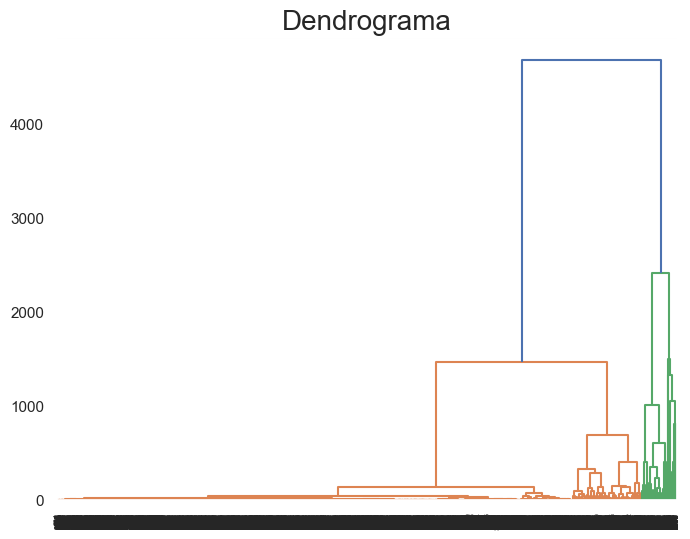

In [52]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Graficas el dendodrama
plt.figure(figsize=(8,6))  
plt.title("Dendrograma", fontsize=20)
dendrograma = sch.dendrogram(sch.linkage(pca_fb[['PCA1', 'PCA2']], method='ward'))

### De forma complementaria realizamos un método de rendimiento ( Silhouette) para elegir el mejor número de Clusters

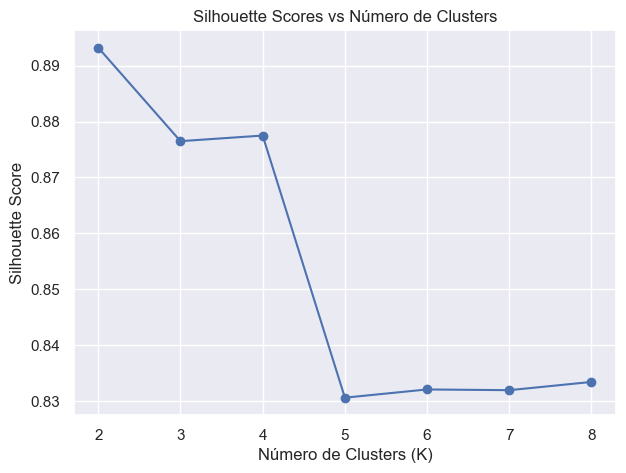

In [53]:
def plot_silhouette_agglo(data, k_values):
    silhouette_scores = []

    for k in k_values:
        agglo = AgglomerativeClustering(n_clusters=k ,affinity='euclidean', linkage='ward')
        cluster_labels = agglo.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plotting the Silhouette scores
    plt.plot(k_values, silhouette_scores, 'bo-')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores vs Número de Clusters')
    plt.show()

# Usage example
k_values = [2, 3, 4, 5, 6, 7, 8]
plot_silhouette_agglo(pca_fb[['PCA1', 'PCA2']], k_values)

> En este método de igual forma sugiere que el número de cluster ideal debería ser 2, aunque a diferencia del método anterior(kmeans), el rendimiento de los cluster 3 y 4 son muy similares. Hay que recordar que en este tipo de modelos es importante el objetivo del investigador, así que alguien podría elegir k=3 o 4, si su objetivo es tener más cluster para observar distintos comportamientos.

En este caso, basados en el dendograma y en la métrica de rendimiento Silhouette, elegimos **k=2**.

### Entrenamiento del modelo 

In [54]:
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
agglo.fit(pca_fb[['PCA1', 'PCA2']])

agglo_y_pred = agglo.labels_
agglo_y_pred 

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [55]:
df_fb['agglo_cluster_pred'] = agglo_y_pred
pca_fb['agglo_cluster_pred']= agglo_y_pred
df_fb.head(4)

,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys,type,type_link,type_photo,type_status,type_video,km_cluster_pred,agglo_cluster_pred
0,529,512,262,432,92,3,1,1,0,video,0,0,0,1,2,1
1,150,0,0,150,0,0,0,0,0,photo,0,1,0,0,0,1
2,227,236,57,204,21,1,1,0,0,video,0,0,0,1,0,1
3,111,0,0,111,0,0,0,0,0,photo,0,1,0,0,0,1


### Visualización de las variables y Clusters

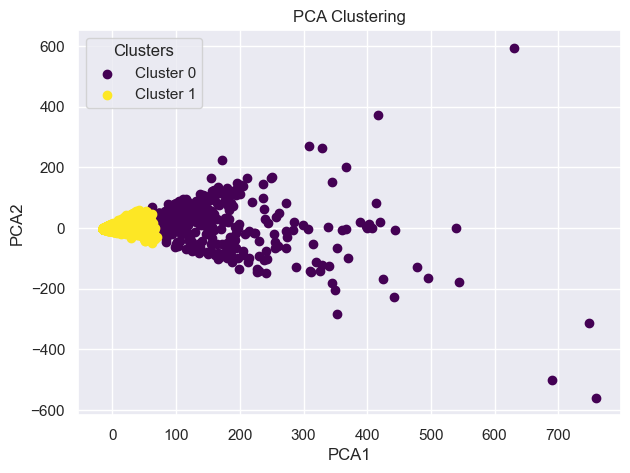

In [56]:
# Como ya habiamos creado la función, solo le pasamos parámetros
plot_clusters(pca_fb[['PCA1', 'PCA2']], pca_fb.agglo_cluster_pred)

In [57]:
df_fb.groupby('agglo_cluster_pred')[['reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas','sads', 'angrys']].mean().astype(int)

,reactions,comments,shares,likes,loves,wows,hahas,sads,angrys
agglo_cluster_pred,,,,,,,,,
0,608,2832,448,462,125,12,6,1,0
1,201,68,15,194,5,0,0,0,0


Text(0.5, 1.0, 'Número de filas/registros por Cluster')

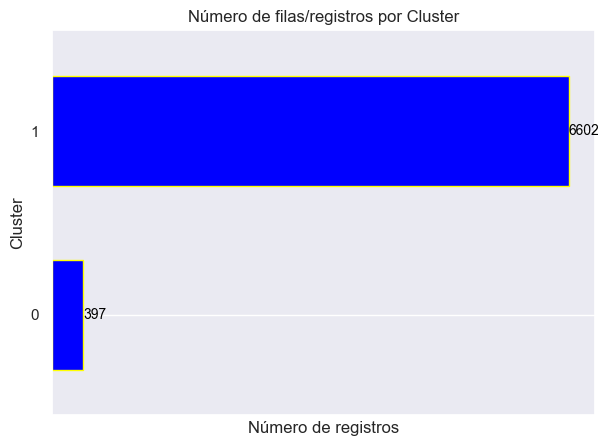

In [58]:
ax= pca_fb.agglo_cluster_pred.value_counts().sort_values().plot(kind='barh',color='blue',edgecolor='yellow',width=0.6)
ax.bar_label(ax.containers[0], fontsize=10, color='black', label_type='edge')
ax.set_xticks([])
plt.xlabel('Número de registros')
plt.ylabel('Cluster')
plt.title('Número de filas/registros por Cluster')

> El cluster 1 con 6602 registros muestra distribución en el gráfico de PCA más unido, más compacto. En el caso del cluster 0 ocupa mayor espacio visual pero tiene menos registros (397), lo que significa que esta más disperso que el cluster 1. 


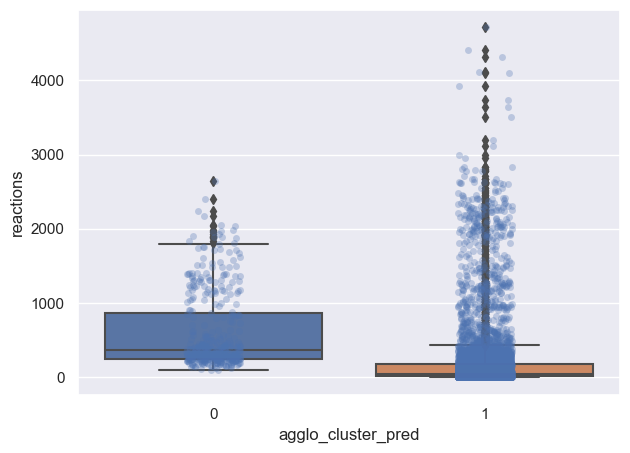

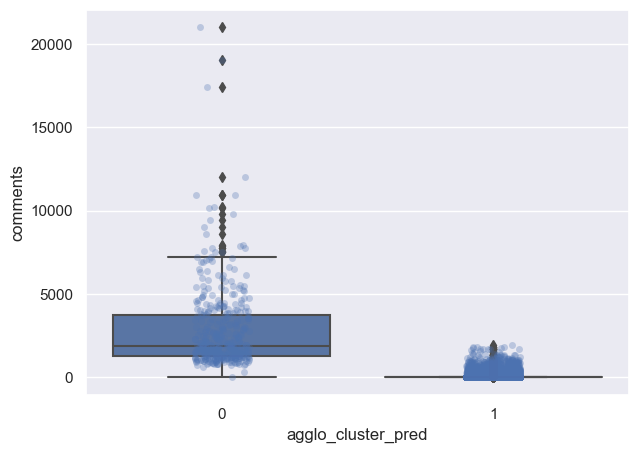

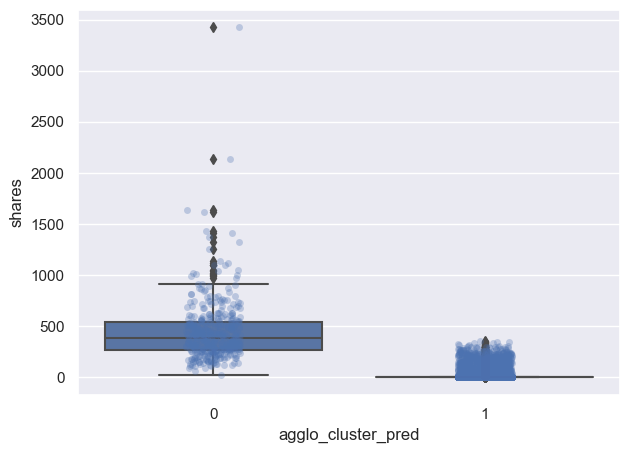

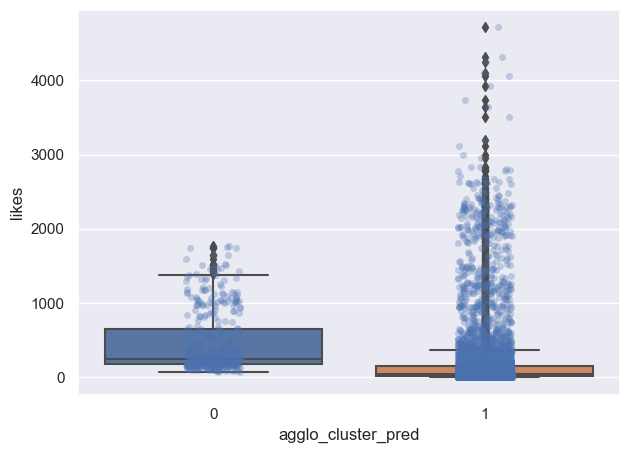

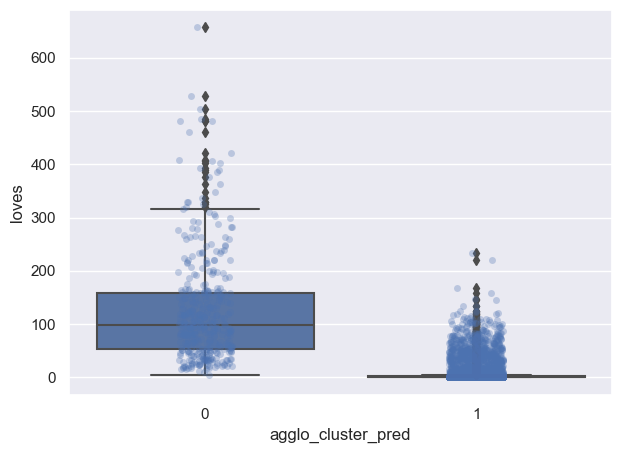

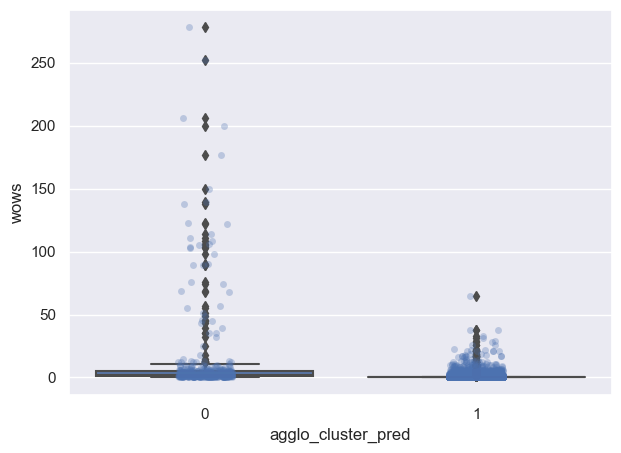

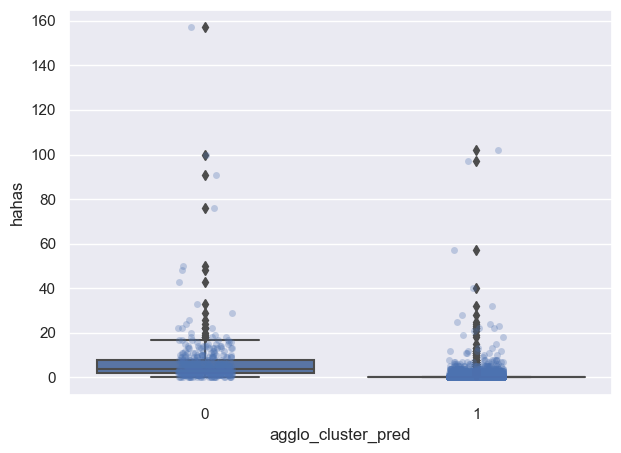

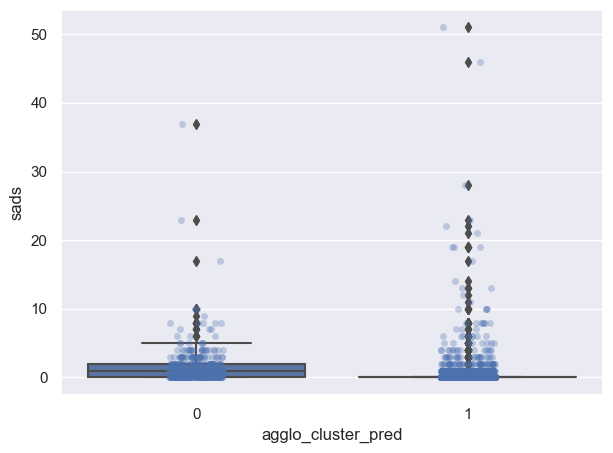

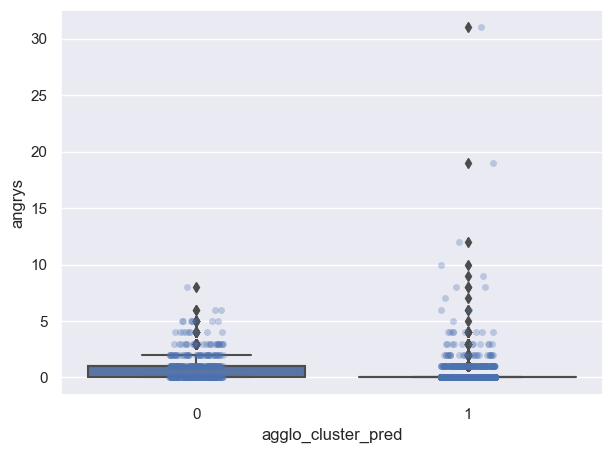

In [59]:
cols = ['reactions', 'comments', 'shares', 'likes', 'loves', 'wows', 'hahas','sads', 'angrys']

for i in cols:
    plt.figure()
    sns.set(rc={"figure.figsize":(7, 5)})
    plt.tight_layout()
    sns.boxplot(x='agglo_cluster_pred', y=i, data=df_fb)
    sns.stripplot(x='agglo_cluster_pred', y=i, data=df_fb, alpha=0.3)

<Axes: xlabel='agglo_cluster_pred', ylabel='count'>

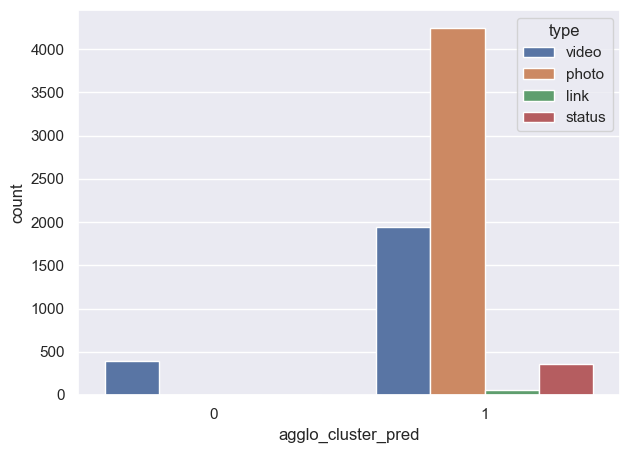

In [60]:
sns.countplot(x="agglo_cluster_pred", hue="type", data=df_fb)

> La gráfica anterior muestra que el cluster 0 tiene menos registros de videos, aunque su cluster principalmente agrupa videos y con muchas interacciones. Por el contrario del cluster 1 que agrupa registros más variados(fotos principalmente, fotos, status).

**Conclusiones:**

> Los clusters no tendran la misma cantidad de registros, en nuestro caso se puede visualizar como el cluster 1 tiene 6602 y otro cluster con 397.
> Si se quiere entender mejor el comportamiento de diferentes posibles grupos, se tiene que elegir más clusters aunque el rendimiento se reduzca. 
> Es interesante analizar las medias de los valores en cada cluster para conocer los valores medios que tiene las distintas variables(en este caso angrys, hahas...etc). De esta forma, conoceremos
de una mejor manera su comportamiento general.

> La diferencia que encontramos entre el kmeans y agglomaration fue el número de Clusters, en el primero elegimos 3 y en el segundo. Es importante resaltar que, aunque podemos elegir exactamente lo 
que nos indican los diferentes métodos como "elbow" o silouette, en este tipo de métodos también influye mucho el expertise y objetivos  que tenga el investigador para elegir un número de clusters a otro. 

La agrupación por agglomeration utiliza el dendograma como técnica de visualización y elección del numero de clusters. Adicional, toma en cuenta que tan parecidos son los valores entre sí, les da una jerarquía.

# Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

Ya hemos utilizado el método de silhouette en los ejercicios 1 y 2 para analizar el rendimiento de cada modelos por diferentes clusters.
